# Summarization Comparison

### Imports

In [6]:
!pip install -U transformers kaggle

Requirement already up-to-date: transformers in /usr/local/lib/python3.6/dist-packages (3.3.1)
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


In [7]:
import numpy as np

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import pandas as pd
import time
import gc

In [8]:
#from transformers import pipeline; print(pipeline('sentiment-analysis')('I hate you'))

### Read in Data
Reads in the 3 csv files, drops unneeded columns, then concatenates them together. 

In [9]:
from google.colab import files

# Uncomment this line to upload data file
uploaded = files.upload()

Saving data.csv to data.csv


In [10]:
df = pd.read_csv('data.csv')

In [11]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...


In [12]:
df.describe

<bound method NDFrame.describe of    Unnamed: 0     id  ... url                                            content
0           0  17283  ... NaN  WASHINGTON  —   Congressional Republicans have...

[1 rows x 10 columns]>

## Summarizing Using Different Models

Used different models through huggingface's transformers

### T5

In [13]:
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [14]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=512, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_T5 = tokenizer.decode(outputs[0])
end = time.time()
t5_time = (end - start)
print(t5_time)

17.33999466896057


In [15]:
del tokenizer
del model
gc.collect()

573

### BERT

In [16]:
model = AutoModelWithLMHead.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:785: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=100, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_BERT = tokenizer.decode(outputs[0])
end = time.time()
BERT_time = (end-start)
print(BERT_time)

96.80030965805054


In [18]:
del tokenizer
del model
gc.collect()

0

### GPT 

In [19]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:785: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [20]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_GPT = tokenizer.decode(outputs[0])
end = time.time()
GPT_time = (end - start)
print(GPT_time)

2.6556828022003174


In [21]:
del tokenizer
del model
gc.collect()

0

### DistilBERT

In [22]:
model = AutoModelWithLMHead.from_pretrained('distilgpt2')
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:785: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [23]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_DistilBERT = tokenizer.decode(outputs[0])
end = time.time()
DistilBERT_time = (end - start)
print(DistilBERT_time)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


1.7913501262664795


In [24]:
del tokenizer
del model
gc.collect()

0

### GPT2

In [25]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:785: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [26]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_GPT2 = tokenizer.decode(outputs[0])
end = time.time()
GPT2_time = (end - start)
print(GPT2_time)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


2.8274264335632324


In [27]:
del tokenizer
del model
gc.collect()

0

### T5 Trained on Wikihow

In [28]:
model = AutoModelForSeq2SeqLM.from_pretrained("deep-learning-analytics/wikihow-t5-small")
tokenizer = AutoTokenizer.from_pretrained("deep-learning-analytics/wikihow-t5-small")

In [29]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=1024, truncation=True)
outputs = model.generate(inputs, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_T5_wikihow = tokenizer.decode(outputs[0])
end = time.time()
t5_wikihow_time = (end - start)
print(t5_wikihow_time)

3.634110450744629


In [30]:
del tokenizer
del model
gc.collect()

323

### Pegasus NewsRoom

In [31]:
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-newsroom")
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-newsroom")

In [32]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=200, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_newsroom = tgt_text[0]
pegasus_newsroom_time = (end - start)
print(pegasus_newsroom_time)

35.583874225616455


In [33]:
del tokenizer
del model
gc.collect()

1378



```
# This is formatted as code
```

### Pegasus CNN Daily Mail

In [34]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")

In [35]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=200, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_cnn = tgt_text[0]
pegasus_cnn_time = (end - start)
print(pegasus_cnn_time)

85.19694185256958


In [36]:
del tokenizer
del model
gc.collect()

1375

### Pegasus Multi News

In [37]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-multi_news")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-multi_news")

In [38]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=100, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_multi = tgt_text[0]
pegasus_multi_time = (end - start)
print(pegasus_multi_time)

222.67125034332275


In [39]:
del tokenizer
del model
gc.collect()

1375

### Pegasus Billsum

In [40]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-billsum")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-billsum")

In [41]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=100, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_billsum = tgt_text[0]
pegasus_billsum_time = (end - start)
print(pegasus_billsum_time)

88.43059253692627


In [42]:
del tokenizer
del model
gc.collect()

1375

## Remove Stop Words from Text And Run Some Models

Testing to see if removing stop words improve performance without reducing any accuracy 

In [45]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stoplist = stopwords.words('english')
src_text = df.iloc[0]['content']
clean_word_list = [word for word in src_text.split() if word not in stoplist and word is not '-' and word is not '"' and word is not "'s"]
clean_src_text = ""
print(clean_word_list)
for x in clean_word_list:
  clean_src_text = clean_src_text + x + " "

clean_src_text = clean_src_text[:-1]
print(src_text)
print(clean_src_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['WASHINGTON', '—', 'Congressional', 'Republicans', 'new', 'fear', 'comes', 'health', 'care', 'lawsuit', 'Obama', 'administration:', 'They', 'might', 'win.', 'The', 'incoming', 'Trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit,', 'challenges', 'administration’s', 'authority', 'spend', 'billions', 'dollars', 'health', 'insurance', 'subsidies', 'Americans,', 'handing', 'House', 'Republicans', 'big', 'victory', 'issues.', 'But', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode,', 'leaving', 'millions', 'people', 'without', 'access', 'health', 'insurance', 'Republicans', 'prepared', 'replacement.', 'That', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'Republicans', 'gain', 'full', 'control', 'government.', 'To', 'stave', 'outcome,', 'Re

In [46]:
clean_src_text

'WASHINGTON — Congressional Republicans new fear comes health care lawsuit Obama administration: They might win. The incoming Trump administration could choose longer defend executive branch suit, challenges administration’s authority spend billions dollars health insurance subsidies Americans, handing House Republicans big victory issues. But sudden loss disputed subsidies could conceivably cause health care program implode, leaving millions people without access health insurance Republicans prepared replacement. That could lead chaos insurance market spur political backlash Republicans gain full control government. To stave outcome, Republicans could find awkward position appropriating huge sums temporarily prop Obama health care law, angering conservative voters demanding end law years. In another twist, Donald J. Trump’s administration, worried preserving executive branch prerogatives, could choose fight Republican allies House central questions dispute. Eager avoid ugly political 

### T5

In [47]:
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [48]:
start = time.time()
inputs = tokenizer.encode("summarize: " + clean_src_text, return_tensors="pt", max_length=512, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_T5_clean = tokenizer.decode(outputs[0])
end = time.time()
t5_time_clean = (end - start)
print(t5_time_clean)

30.763193130493164


In [49]:
del tokenizer
del model
gc.collect()

531

### Pegasus CNN Daily Mail

In [50]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")

In [51]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch([clean_src_text], max_target_length=200, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_cnn_clean = tgt_text[0]
pegasus_cnn_time_clean = (end - start)
print(pegasus_cnn_time_clean)

69.5697865486145


In [52]:
del tokenizer
del model
gc.collect()

1375

## Results Analysis

### Print All Decoded Summaries

In [53]:
decoded_BERT

'[CLS] summarize : WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration : They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration ’ s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably cause the health care [SEP] If - - - - - - - - - - - - that the situation changes when - - - - - - - - - - - - - - - - - If the situation changes, the situation changes. - - - - - -'

In [54]:
decoded_T5

'a sudden loss of the disputed subsidies could conceivably cause the health care program to implode. that could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. the incoming Trump administration could choose to no longer defend the executive branch against the suit.'

In [55]:
decoded_DistilBERT

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [56]:
decoded_GPT

'summarize : washington <unk>congressional republicans have a new fear when it comes to their health care lawsuit against the obama administration : they might win. the incoming trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration <unk>s authority to spend billions of dollars on health insurance subsidies for and americans, handing house republicans a big victory on issues. but a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before republicans have prepared a replacement. that could lead to chaos in the insurance market and spur a political backlash just as republicans gain full control of the government. to stave off that outcome, republicans could find a'

In [57]:
decoded_DistilBERT

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [58]:
decoded_T5_wikihow

'Defend the health care lawsuit against the Obama administration.Consider a temporary suspension'

In [59]:
decoded_GPT2

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [60]:
decoded_pegasus_newsroom

'Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win.'

In [61]:
decoded_pegasus_cnn

'The incoming Trump administration could choose to no longer defend the executive branch against the suit.<n>A sudden loss of the disputed subsidies could conceivably cause the health care program to implode.<n>Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law.'

In [62]:
decoded_pegasus_multi

"– A lawsuit brought by House Republicans against the Obama administration over ObamaCare could cost the government up to $13 billion, the New York Times reports. The lawsuit, which has been put on hold since Donald Trump's election victory, claims the Obama administration is violating the Constitution by making subsidies available to people who don't have health insurance. House Republicans say Congress never appropriated the money for the subsidies, which are paid to insurance companies to help defray costs for low- and middle-income people. The Obama administration says the subsidies are a permanent part of the Affordable Care Act, even though Congress never appropriated the money for them. If the subsidies are cut off, millions of low- and middle-income people could lose their insurance. The House Republicans' lawsuit has been seeking to stop the subsidies, and they have asked the Obama administration to stop paying them until the case is resolved. The Justice Department has refuse

In [63]:
decoded_pegasus_billsum

'Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: the incoming Trump administration could choose to no longer defend the executive branch against the challenges to which the Department of the Treasury has been put in until at least late by the United States Court of Appeals for the District of Columbia Circuit; and the transition team for the President will evaluate this case and all related aspects of the Affordable Care Act.'

In [64]:
decoded_pegasus_cnn_clean

'House Republicans sued the Obama administration over spending on health insurance subsidies.<n>A federal judge ruled in favor of House Republicans, but the case was put on hold until after the election.<n>Donald J. Trump’s administration could choose to fight House Republicans.<n>Republicans could find awkward position appropriating huge sums temporarily prop Obama health care law.<n>That could lead chaos insurance market spur political backlash Republicans gain full control government.'

In [65]:
decoded_T5_clean

'sudden loss disputed subsidies could conceivably cause health care program implode. that could lead chaos insurance market spur political backlash Republicans gain full control government. to stave outcome, Republicans could find awkward position appropriating huge sums temporarily prop Obama health care law.'

In [66]:
src_text

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

### Charts

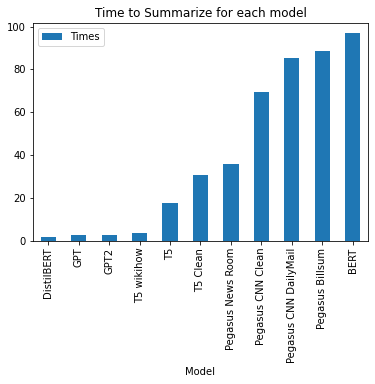

In [67]:
import matplotlib.pyplot as plot
time_array = {
    'Model': ["BERT", "T5", "DistilBERT", "GPT", "GPT2", "T5 wikihow", "Pegasus News Room", "Pegasus CNN DailyMail", "Pegasus Billsum", "Pegasus CNN Clean", "T5 Clean"], 
    'Times': [BERT_time, t5_time, DistilBERT_time, GPT_time, GPT2_time, t5_wikihow_time, pegasus_newsroom_time, pegasus_cnn_time, pegasus_billsum_time, pegasus_cnn_time_clean, t5_time_clean]
    }
df_time = pd.DataFrame(data=time_array)
df_time.sort_values('Times').plot.bar(x="Model", y="Times", title="Time to Summarize for each model")
plot.show()

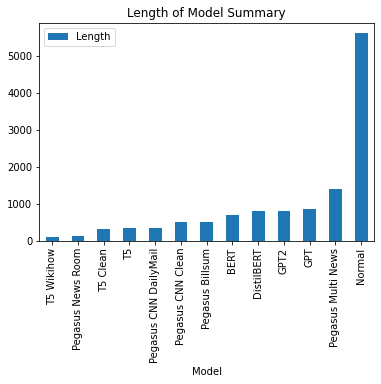

In [68]:
length_dict = {
    "Model": ["Normal", "BERT", "T5", "DistilBERT", "GPT", "GPT2", "T5 Wikihow", "Pegasus News Room", "Pegasus CNN DailyMail", "Pegasus Multi News", "Pegasus Billsum", "Pegasus CNN Clean", "T5 Clean"], 
    "Length": [
               (len(df.iloc[0]['content'])),
               (len(decoded_BERT)), (len(decoded_T5)),
               (len(decoded_DistilBERT)),
               (len(decoded_GPT)),
               (len(decoded_GPT2)),
               (len(decoded_T5_wikihow)),
               (len(decoded_pegasus_newsroom)),
               (len(decoded_pegasus_cnn)),
               (len(decoded_pegasus_multi)),
               (len(decoded_pegasus_billsum)),
               (len(decoded_pegasus_cnn_clean)),
               (len(decoded_T5_clean)),
               ]
  }
df_length = pd.DataFrame(data=length_dict)
df_length.sort_values('Length').plot.bar(x="Model", y="Length", title="Length of Model Summary")
plot.show()

### ROGUE Metrics

In [69]:
def print_score_results(dictionary):
  print("ROGUE-1")
  for ch in dictionary['rouge-1']:
    print(f"   {ch}: {dictionary['rouge-1'][ch]}")
  print("ROUGE-2")
  for ch in dictionary['rouge-2']:
    print(f"   {ch}: {dictionary['rouge-2'][ch]}")
  print("ROUGE-L")
  for ch in dictionary['rouge-l']:
    print(f"   {ch}: {dictionary['rouge-l'][ch]}")

In [70]:
human_summarized = "WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angeg conservative voters who have been demanding an end to the law for years. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacemen It is a complicated set of dynamics illustrating how a quick legal victory for the House in the Trump era might come with costs that Republicans never anticipated when they took on the Obama White House. Just as important to House Republicans, Judge Collyer found that Congress had the standing to sue the White House on this issue — a ruling that many legal experts said was flawed — and they want that precedent to be set to restore congressional leverage over the executive branch. But on spending power and standing, the Trump administration may come under pressure from advocates of presidential authority to fight the House no matter their shared views on health care, since those precedents could have broad repercussions. Anticipating that the Trump administration might not be inclined to mount a vigorous fight against the House Republicans given the ’s dim view of the health care law, a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program. In another twist, Donald J. Trump’s administration, worried about preserving executive branch prerogatives, could choose to fight its Republican allies in the House on some central questions in the dispute. “Upon taking office, the Trump administration will evaluate this case and all related aspects of the Affordable Care Act. Eager to avoid an ugly political pileup, Republicans on Capitol Hill and the Trump transition team are gaming out how to handle the lawsuit, which, after the election, has been put in limbo until at least late February by the United States Court of Appeals for the District of Columbia Circuit. “Given that this pending litigation involves the Obama administration and Congress, it would be inappropriate to comment,” said Phillip J. Blando, a spokesman for the Trump transition effort. House Republicans contend that Congress never appropriated the money for the subsidies, as required by the Constitution. The White House said that the spending was a permanent part of the law passed in 2010, and that no annual appropriation was required — even though the administration initially sought one. ” No matter what happens, House Republicans say, they want to prevail on two overarching concepts: the congressional power of the purse, and the right of Congress to sue the executive branch if it violates the Constitution regarding that spending power."""
print(human_summarized)

WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angeg conservative voters who have been demanding an end to the law for years. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacemen It is a complicated set of dynamics illustrating how a quick legal victory for the House in the Trump era might come

In [71]:
!pip install -U rouge

In [72]:
from rouge import Rouge 
rouge = Rouge()

In [73]:
scores_t5 = rouge.get_scores(decoded_T5, human_summarized)
print_score_results(scores_t5[0])

ROGUE-1
   f: 0.1480206523306899
   p: 0.7818181818181819
   r: 0.0817490494296578
ROUGE-2
   f: 0.10017270988035476
   p: 0.5370370370370371
   r: 0.05523809523809524
ROUGE-L
   f: 0.1857585116238055
   p: 0.6976744186046512
   r: 0.10714285714285714


In [74]:
scores_BERT = rouge.get_scores(decoded_BERT, human_summarized)
print_score_results(scores_BERT[0])

ROGUE-1
   f: 0.25189681013178106
   p: 0.6240601503759399
   r: 0.15779467680608364
ROUGE-2
   f: 0.2283104990721628
   p: 0.5681818181818182
   r: 0.14285714285714285
ROUGE-L
   f: 0.33714285394285715
   p: 0.8428571428571429
   r: 0.21071428571428572


In [75]:
scores_GPT2 = rouge.get_scores(decoded_GPT2, human_summarized)
print_score_results(scores_GPT2[0])

ROGUE-1
   f: 0.32817337158795734
   p: 0.8833333333333333
   r: 0.20152091254752852
ROUGE-2
   f: 0.2950310528878612
   p: 0.7983193277310925
   r: 0.18095238095238095
ROUGE-L
   f: 0.389041092317508
   p: 0.8352941176470589
   r: 0.25357142857142856


In [76]:
scores_pegasus_cnn = rouge.get_scores(decoded_pegasus_cnn, human_summarized)
print_score_results(scores_pegasus_cnn[0])

ROGUE-1
   f: 0.16925733857863454
   p: 0.9245283018867925
   r: 0.09315589353612168
ROUGE-2
   f: 0.1559792011329743
   p: 0.8653846153846154
   r: 0.08571428571428572
ROUGE-L
   f: 0.2305295927873371
   p: 0.9024390243902439
   r: 0.13214285714285715


In [77]:
scores_pegasus_cnn_clean = rouge.get_scores(decoded_pegasus_cnn_clean, human_summarized)
print_score_results(scores_pegasus_cnn_clean[0])

ROGUE-1
   f: 0.1644295281282375
   p: 0.7
   r: 0.09315589353612168
ROUGE-2
   f: 0.07407407202071223
   p: 0.3188405797101449
   r: 0.0419047619047619
ROUGE-L
   f: 0.20771513072053116
   p: 0.6140350877192983
   r: 0.125


In [78]:
scores_t5_clean = rouge.get_scores(decoded_T5_clean, human_summarized)
print_score_results(scores_t5_clean[0])

ROGUE-1
   f: 0.11267605496850824
   p: 0.7619047619047619
   r: 0.060836501901140684
ROUGE-2
   f: 0.05653710112968076
   p: 0.3902439024390244
   r: 0.030476190476190476
ROUGE-L
   f: 0.17034700109265694
   p: 0.7297297297297297
   r: 0.09642857142857143
